In [2]:
import pandas as pd
import numpy as np

In [3]:
sales_data = pd.read_csv("../../data/02_processed_data/02_cannabis_sales/sales_data.csv")

In [4]:
sales_data

,REF_DATE,GEO,DGUID,Type of cannabis,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VALUE
0,2021/2022,Canada,2021A000011124,Total cannabis products,Dollars,81,thousands,3,4027928.0
1,2021/2022,Canada,2021A000011124,Dried cannabis,Dollars,81,thousands,3,2861838.0
2,2021/2022,Canada,2021A000011124,Inhaled cannabis extracts,Dollars,81,thousands,3,729178.0
3,2021/2022,Canada,2021A000011124,Ingested cannabis extracts,Dollars,81,thousands,3,158283.0
4,2021/2022,Canada,2021A000011124,Solid cannabis edibles,Dollars,81,thousands,3,166336.0
...,...,...,...,...,...,...,...,...,...
583,2023/2024,Nunavut,2021A000262,Inhaled cannabis extracts,Dollars,81,units,0,NaN
584,2023/2024,Nunavut,2021A000262,Ingested cannabis extracts,Dollars,81,units,0,NaN
585,2023/2024,Nunavut,2021A000262,Solid cannabis edibles,Dollars,81,units,0,NaN
586,2023/2024,Nunavut,2021A000262,Cannabis beverages,Dollars,81,units,0,NaN


In [5]:
sales_data['Actual_Sales_CAD'] = sales_data['VALUE'] * 1000

In [6]:
sales_data['REF_DATE'] = sales_data['REF_DATE'].astype('category')

In [7]:
sales_data['Type of cannabis'] = sales_data['Type of cannabis'].str.strip()

In [8]:
print("--- Data Head with New Column ---")
print(sales_data[['Type of cannabis', 'VALUE', 'Actual_Sales_CAD']].head())

--- Data Head with New Column ---
             Type of cannabis      VALUE  Actual_Sales_CAD
0     Total cannabis products  4027928.0      4.027928e+09
1              Dried cannabis  2861838.0      2.861838e+09
2   Inhaled cannabis extracts   729178.0      7.291780e+08
3  Ingested cannabis extracts   158283.0      1.582830e+08
4      Solid cannabis edibles   166336.0      1.663360e+08


In [9]:
print("\n--- Data Info ---")
sales_data.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   REF_DATE          588 non-null    category
 1   GEO               588 non-null    object  
 2   DGUID             588 non-null    object  
 3   Type of cannabis  588 non-null    object  
 4   UOM               588 non-null    object  
 5   UOM_ID            588 non-null    int64   
 6   SCALAR_FACTOR     588 non-null    object  
 7   SCALAR_ID         588 non-null    int64   
 8   VALUE             502 non-null    float64 
 9   Actual_Sales_CAD  502 non-null    float64 
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 42.2+ KB


In [10]:
print("\n--- Missing Values Count ---")
print(sales_data.isnull().sum())


--- Missing Values Count ---
REF_DATE             0
GEO                  0
DGUID                0
Type of cannabis     0
UOM                  0
UOM_ID               0
SCALAR_FACTOR        0
SCALAR_ID            0
VALUE               86
Actual_Sales_CAD    86
dtype: int64


In [11]:
# Total Sales Value by product type, sorted in descending order
sales_by_type = sales_data.groupby('Type of cannabis')['Actual_Sales_CAD'].sum().sort_values(ascending=False)
print("\n--- Total Actual Sales (CAD) by Type of Cannabis ---")
print(sales_by_type)


--- Total Actual Sales (CAD) by Type of Cannabis ---
Type of cannabis
Total cannabis products                         2.776256e+10
Dried cannabis                                  1.814392e+10
Inhaled cannabis extracts                       6.817412e+09
Solid cannabis edibles                          1.202311e+09
Ingested cannabis extracts                      9.762060e+08
Cannabis beverages                              4.377080e+08
Topicals, seeds, and other cannabis products    1.850060e+08
Name: Actual_Sales_CAD, dtype: float64


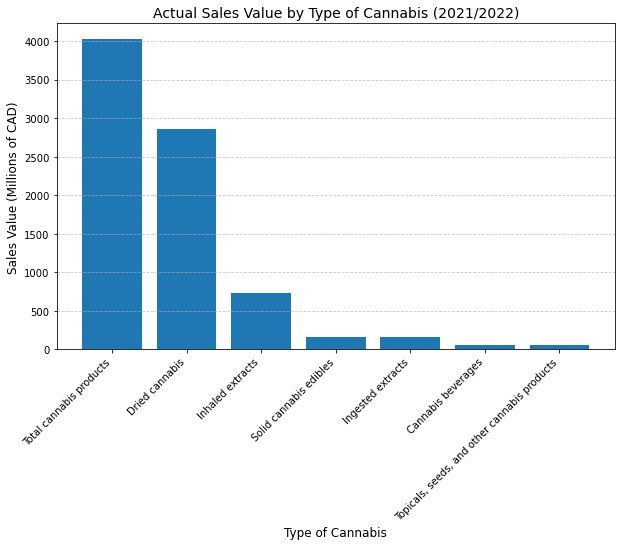

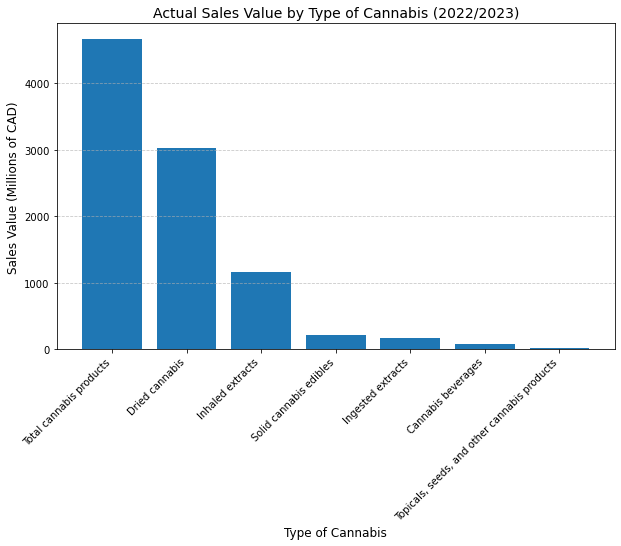

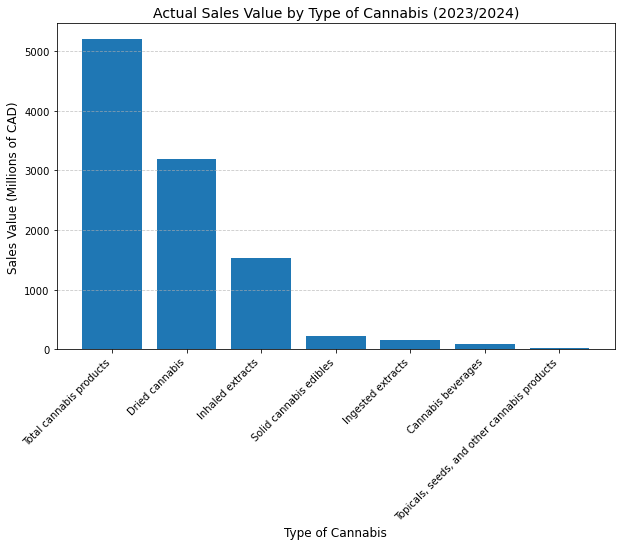

In [17]:
plot_periods = ['2021/2022', '2022/2023', '2023/2024'] 

# Replace long product names globally for consistency
sales_data['Type of cannabis'] = sales_data['Type of cannabis'].str.replace(' cannabis extracts', ' extracts', regex=False)

# Loop through each year to create a separate plot
for period in plot_periods:
    # 1. Filter the data for the current period and exclude the aggregate 'Total' row
    yearly_sales = sales_data[sales_data['REF_DATE'] == period]
    yearly_sales = yearly_sales[yearly_sales['Type of cannabis'] != 'Total products']
    yearly_sales = yearly_sales.sort_values('Actual_Sales_CAD', ascending=False)
    
    if yearly_sales.empty:
        print(f"No data found for period: {period}")
        continue

    # 2. Create the plot
    plt.figure(figsize=(10, 6))
    
    # Divide by 1 million for cleaner y-axis labels
    plt.bar(yearly_sales['Type of cannabis'], yearly_sales['Actual_Sales_CAD'] / 1000000) 
    
    # 3. Add labels and save
    plt.title(f'Actual Sales Value by Type of Cannabis ({period})', fontsize=14)
    plt.xlabel('Type of Cannabis', fontsize=12)
    plt.ylabel('Sales Value (Millions of CAD)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show() # Use plt.show() if running locally to display the plots


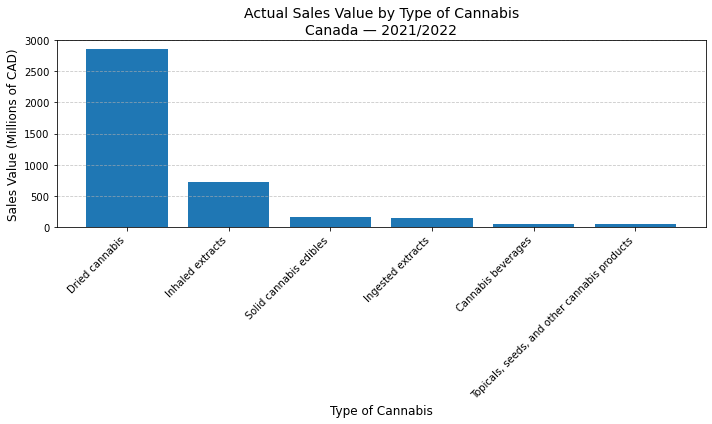

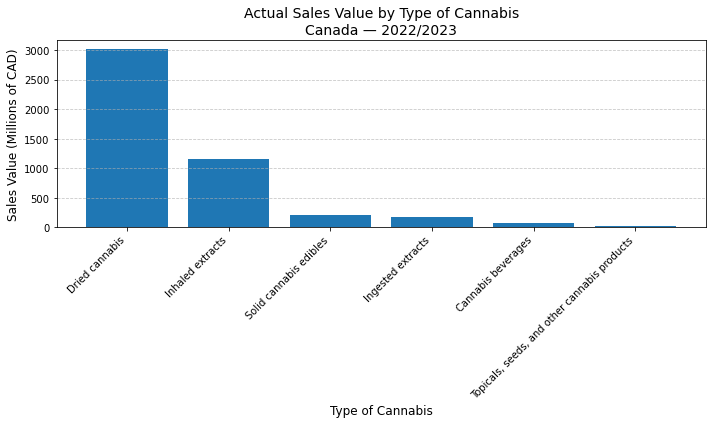

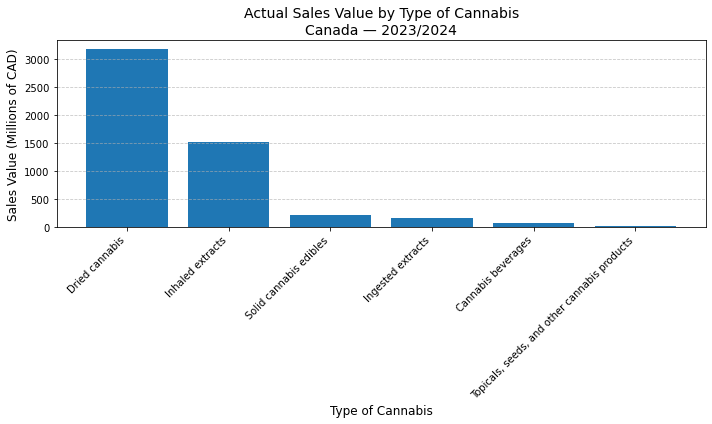

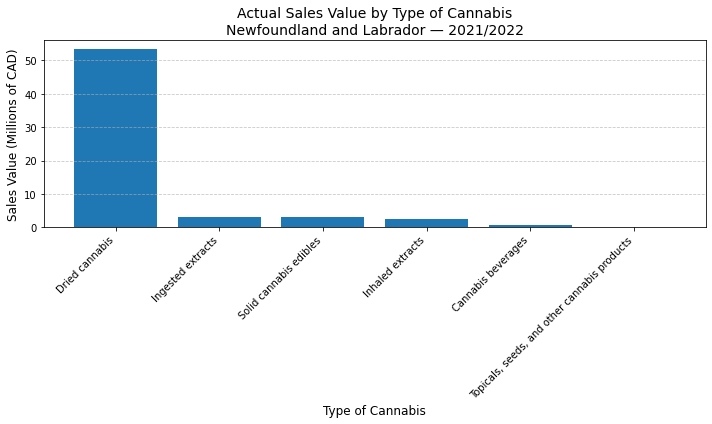

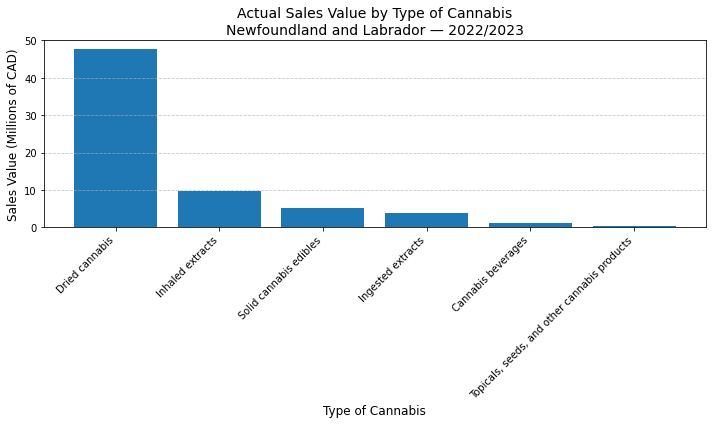

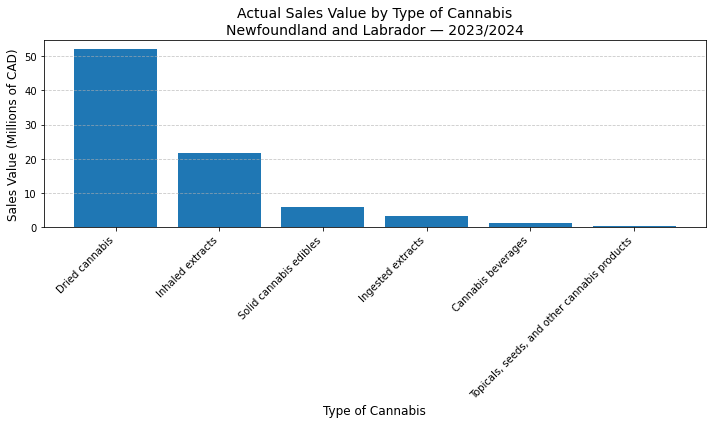

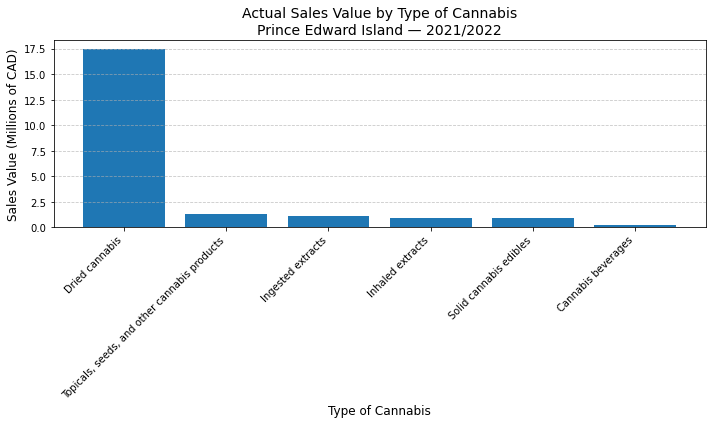

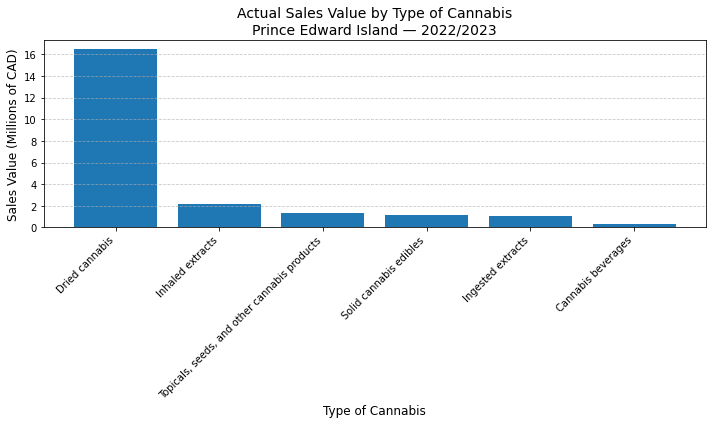

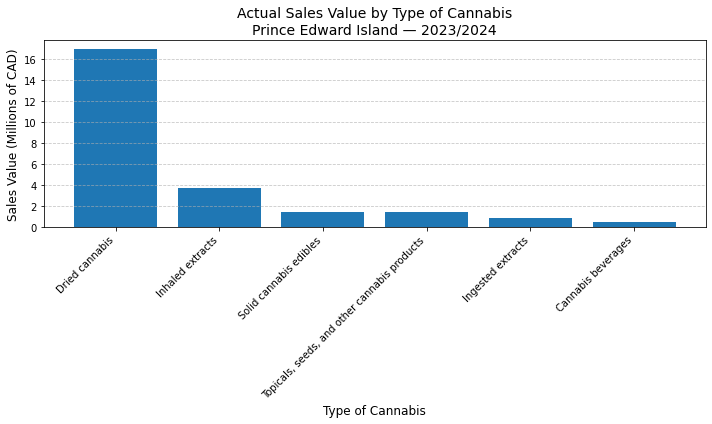

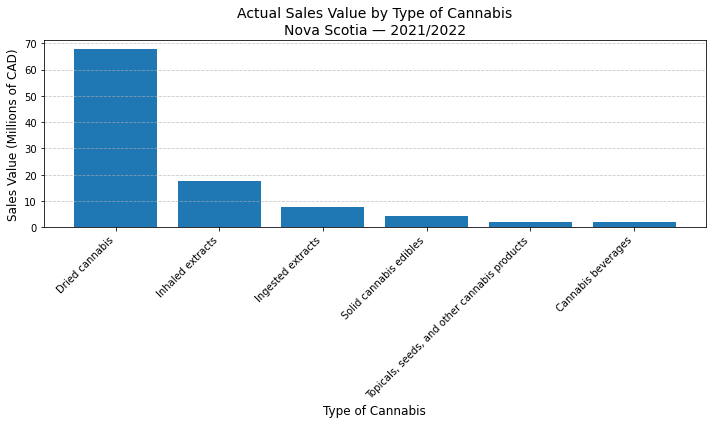

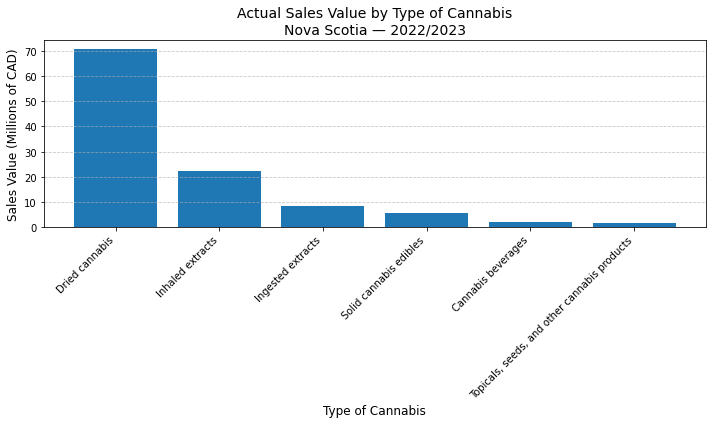

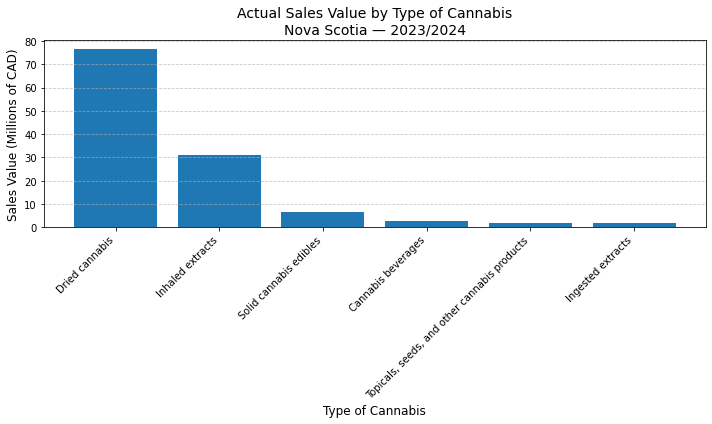

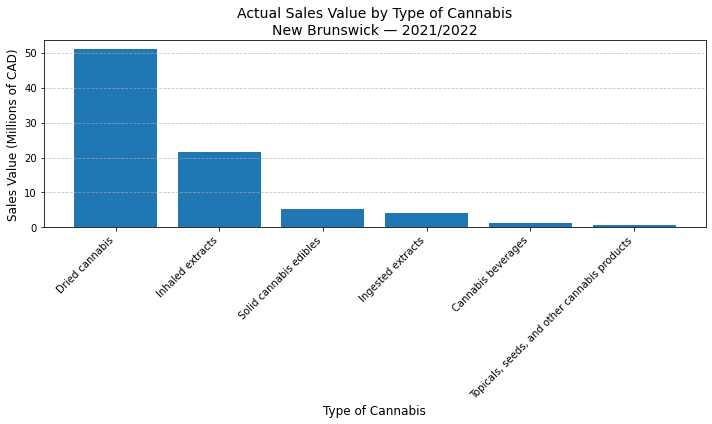

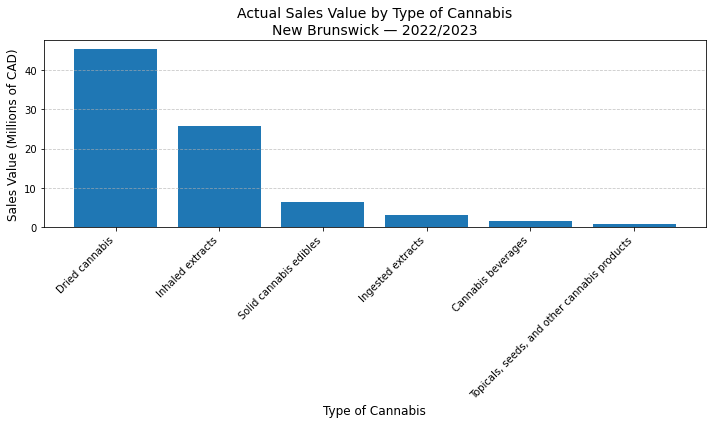

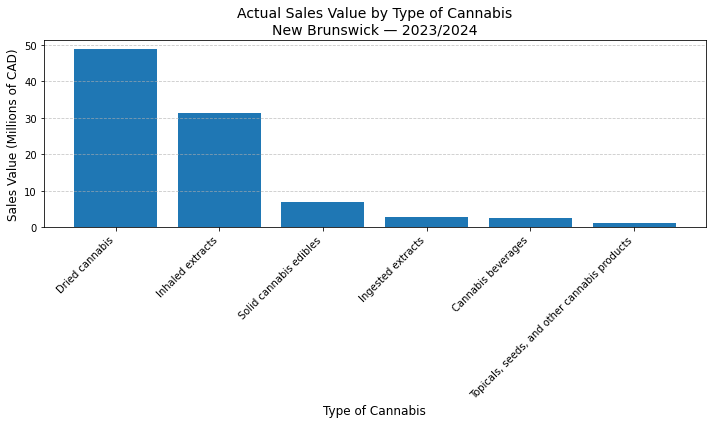

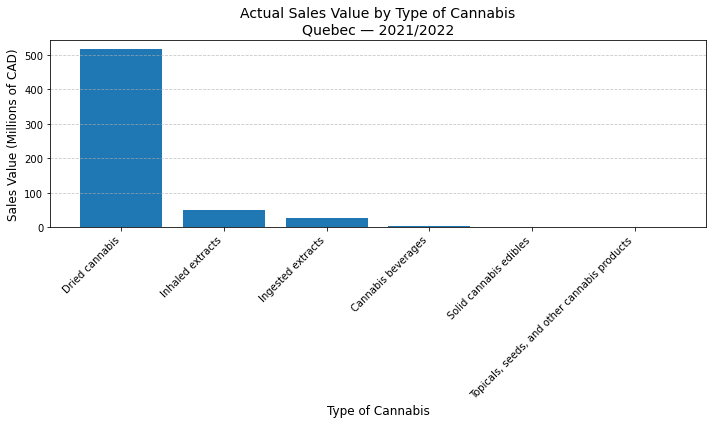

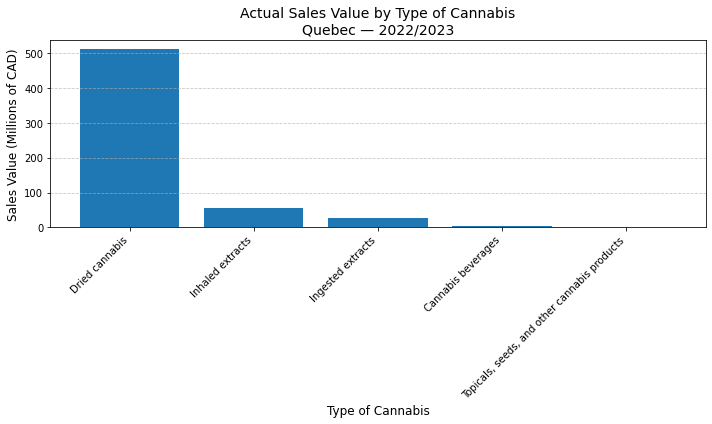

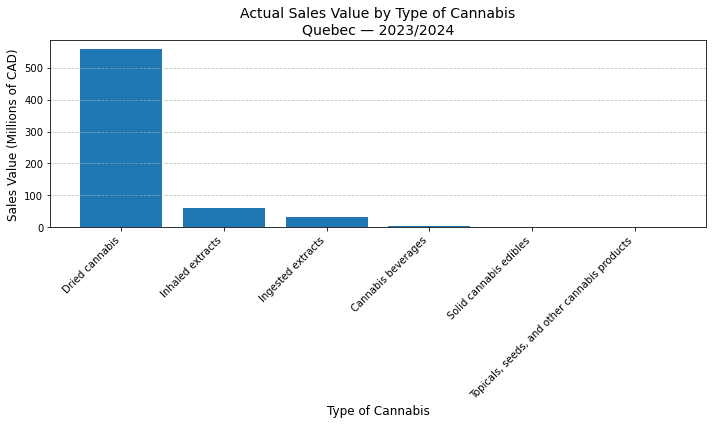

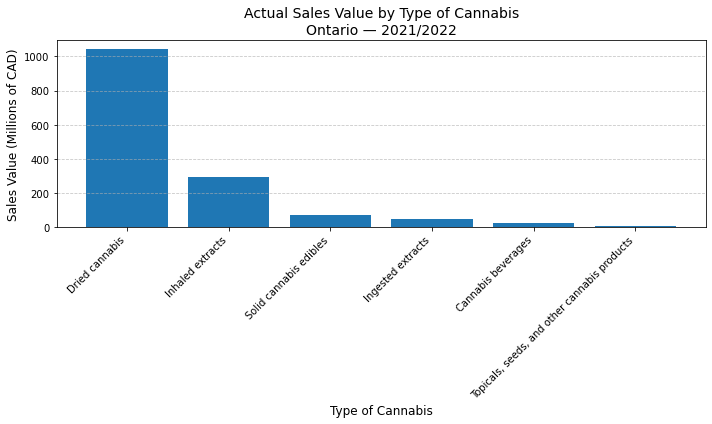

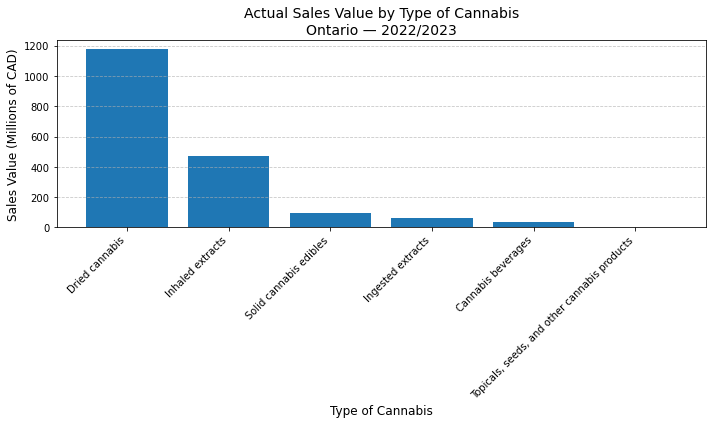

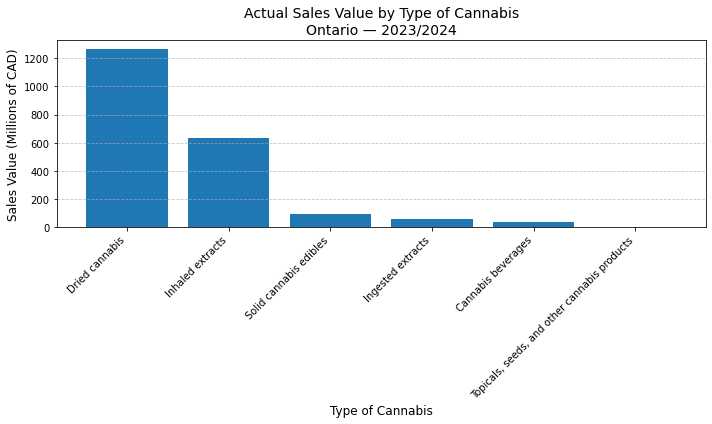

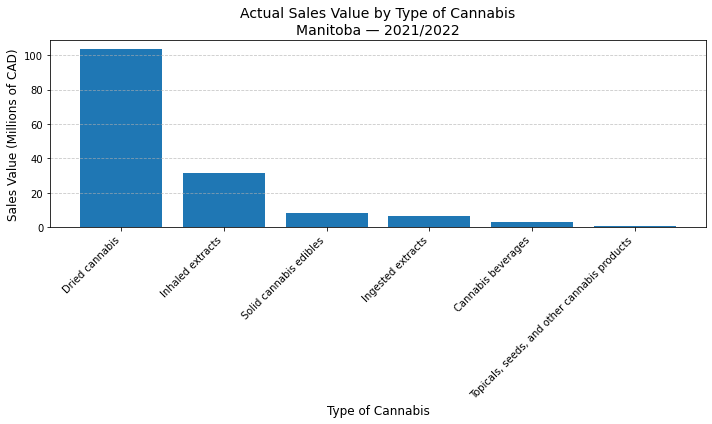

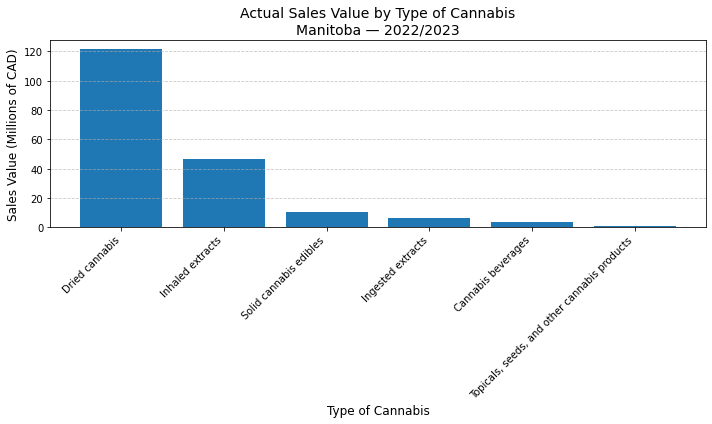

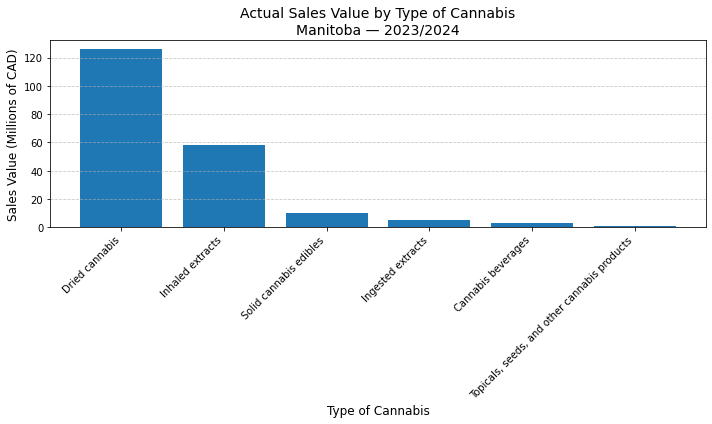

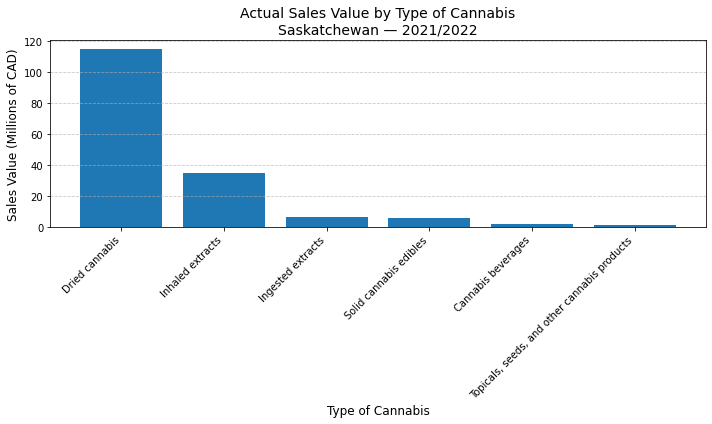

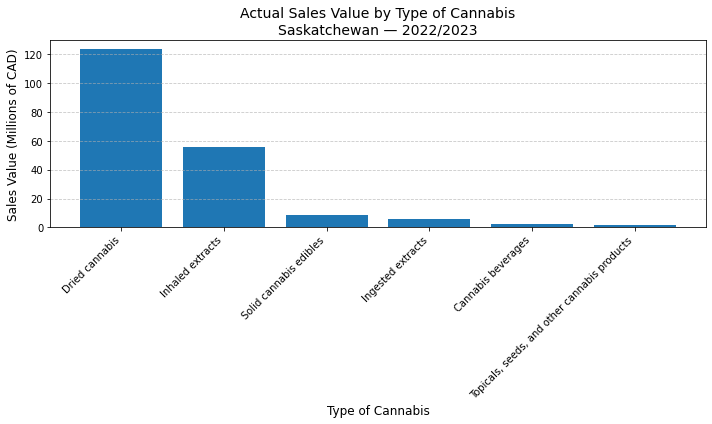

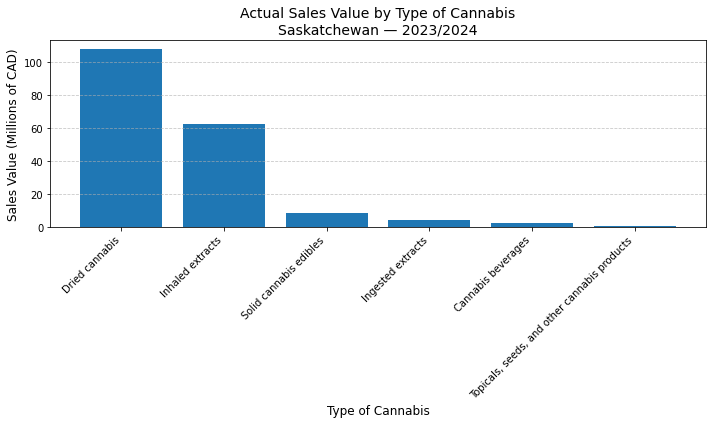

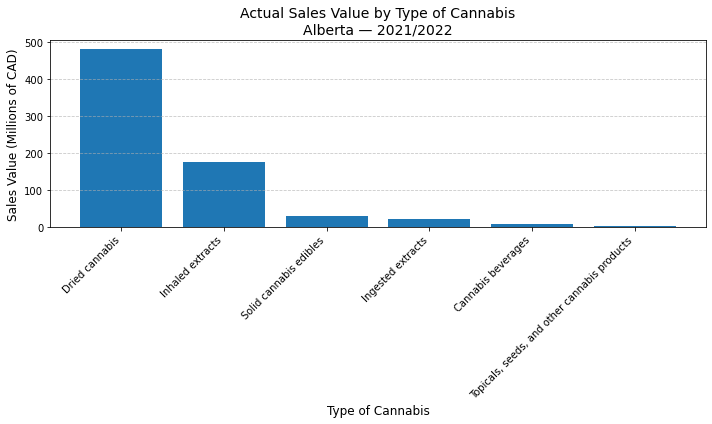

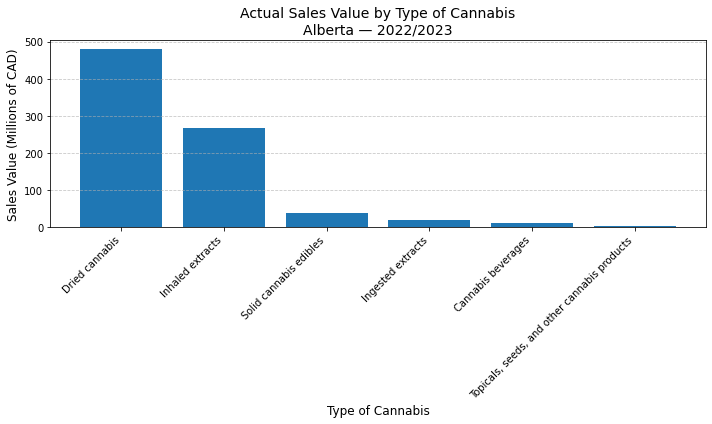

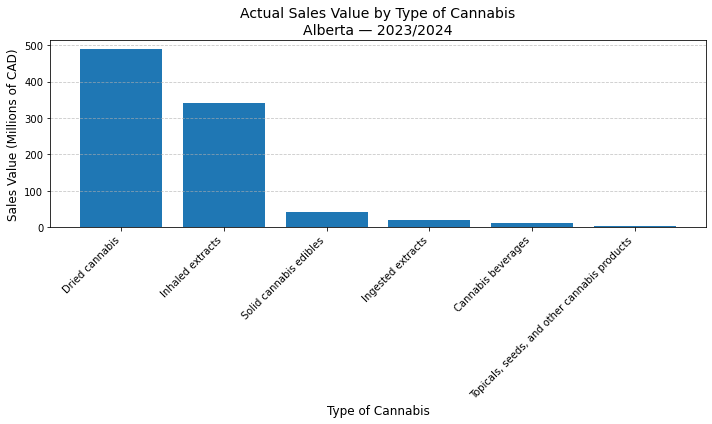

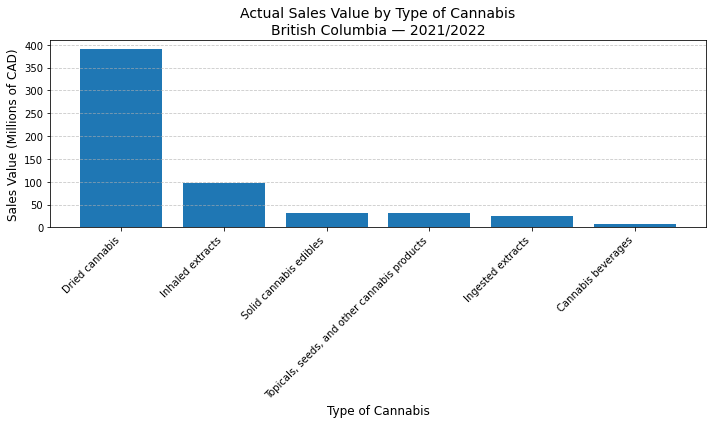

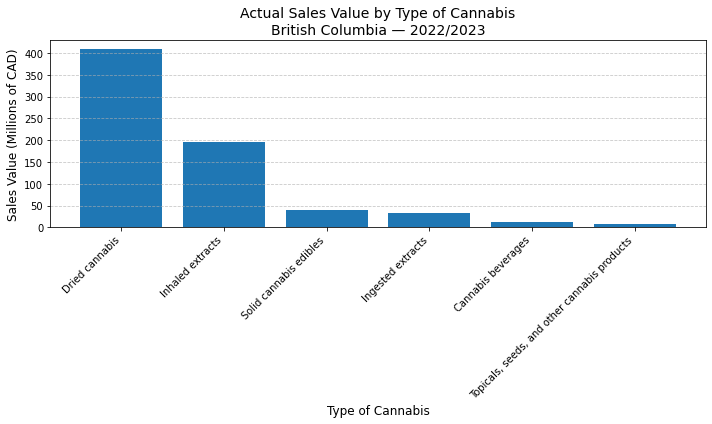

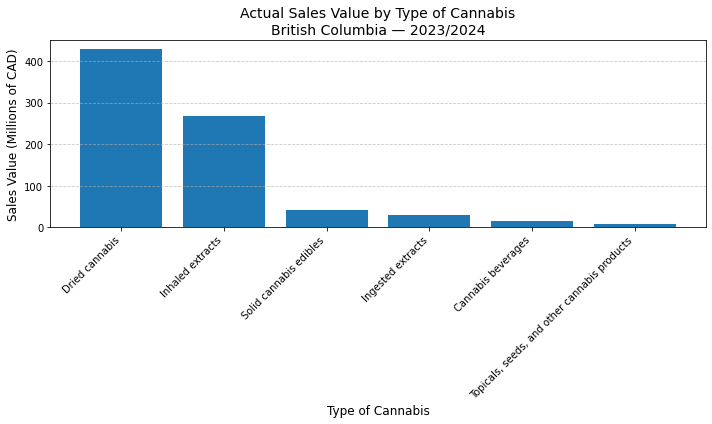

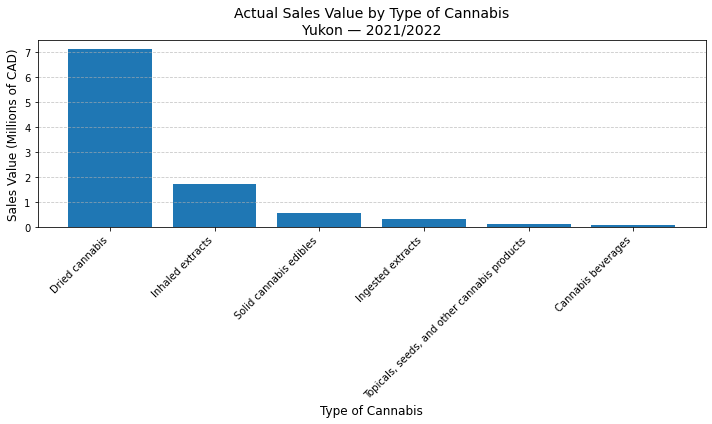

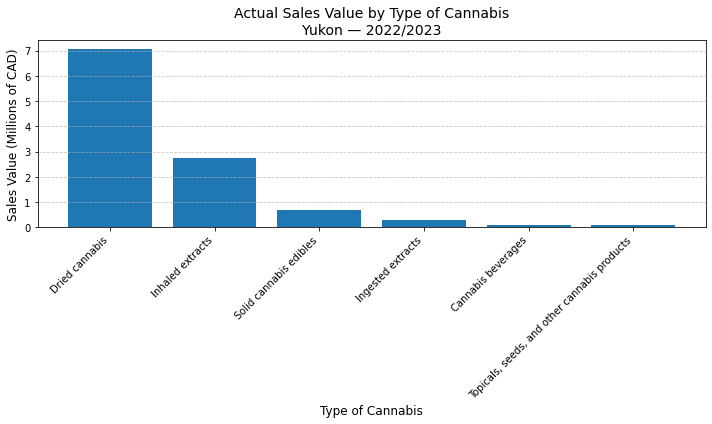

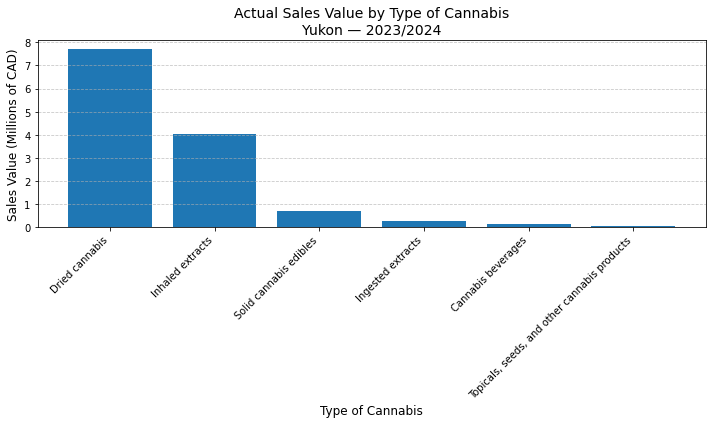

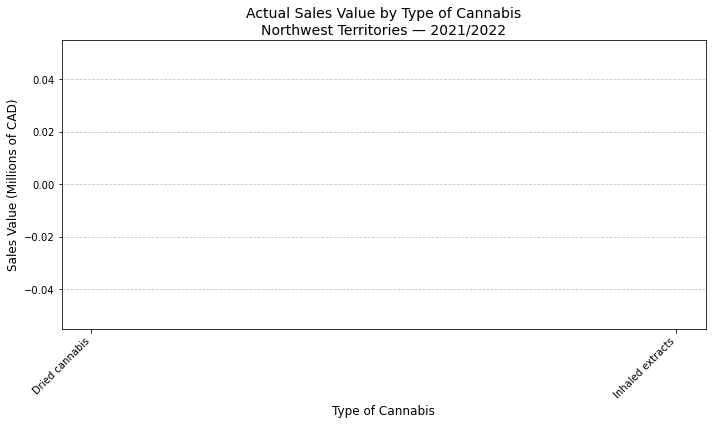

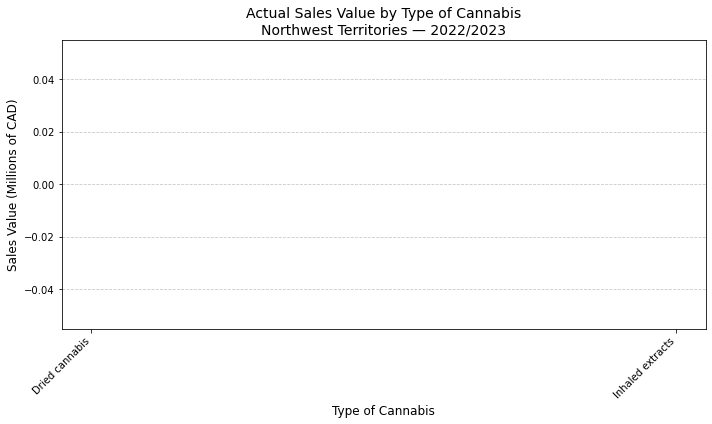

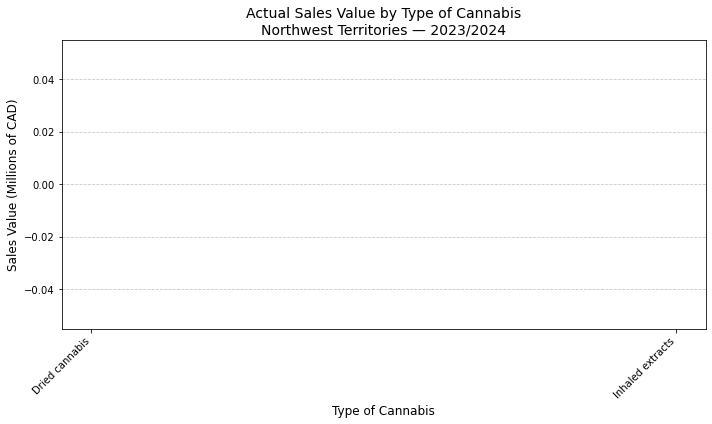

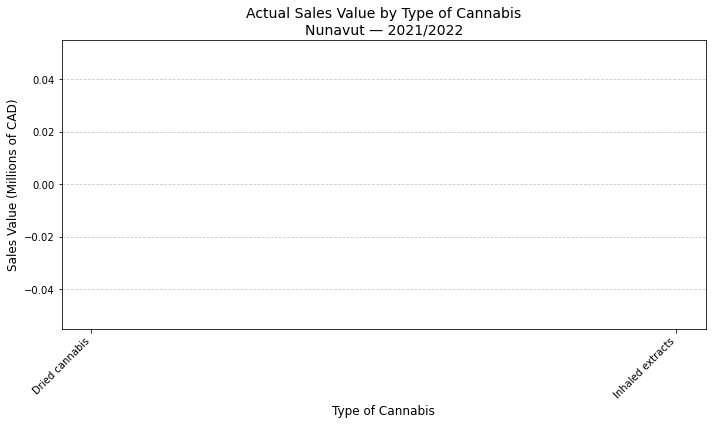

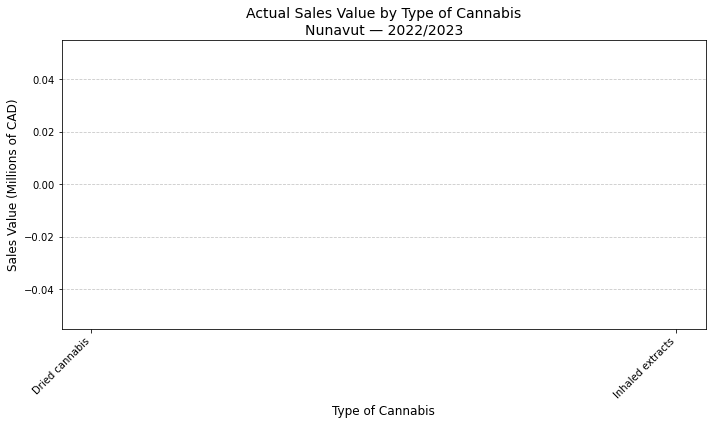

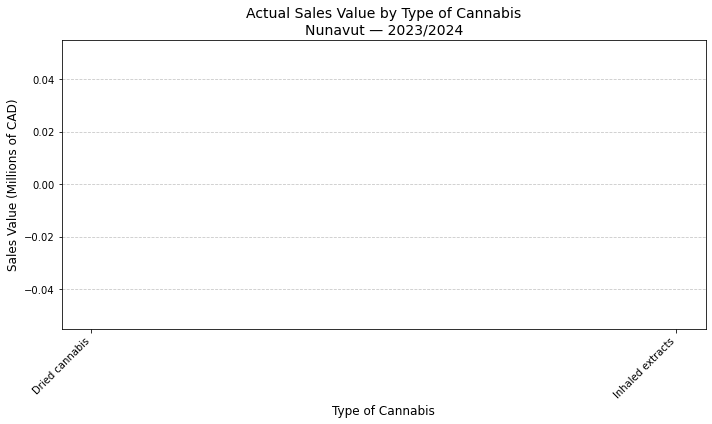

In [18]:
# --- Data Cleaning ---
# Standardize product names globally
sales_data['Type of cannabis'] = (
    sales_data['Type of cannabis']
        .str.replace(' cannabis extracts', ' extracts', regex=False)
)

# Fix Total row naming if needed
sales_data['Type of cannabis'] = sales_data['Type of cannabis'].replace({
    'Total cannabis products': 'Total products'
})

# --- Loop Through Each Location and Each Period ---
for location in sales_data['GEO'].unique():

    location_data = sales_data[sales_data['GEO'] == location]

    for period in plot_periods:

        # 1. Filter by GEO and REF_DATE
        yearly_sales = location_data[location_data['REF_DATE'] == period]

        # 2. Exclude totals
        yearly_sales = yearly_sales[yearly_sales['Type of cannabis'] != 'Total products']

        # If no data, skip
        if yearly_sales.empty:
            print(f"No data found for location '{location}' in period '{period}'")
            continue

        # Sort for nicer plotting
        yearly_sales = yearly_sales.sort_values('Actual_Sales_CAD', ascending=False)

        # 3. Plot
        plt.figure(figsize=(10, 6))
        plt.bar(
            yearly_sales['Type of cannabis'],
            yearly_sales['Actual_Sales_CAD'] / 1_000_000
        )

        # 4. Labels
        plt.title(f'Actual Sales Value by Type of Cannabis\n{location} — {period}', fontsize=14)
        plt.xlabel('Type of Cannabis', fontsize=12)
        plt.ylabel('Sales Value (Millions of CAD)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

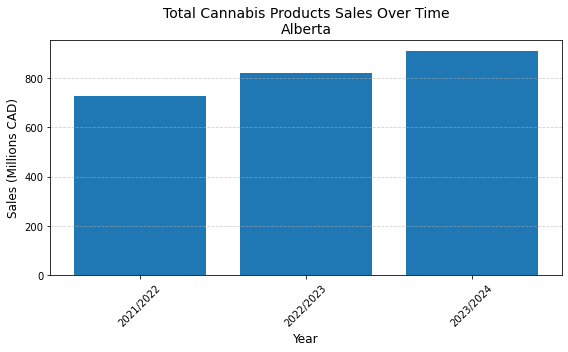

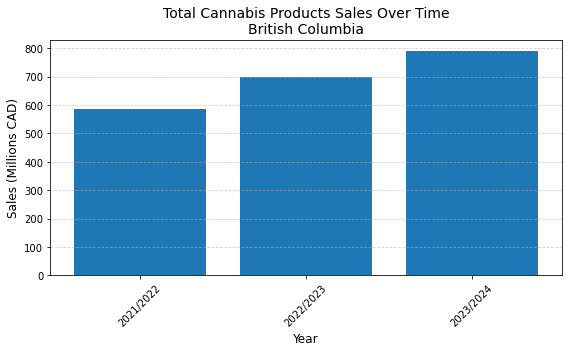

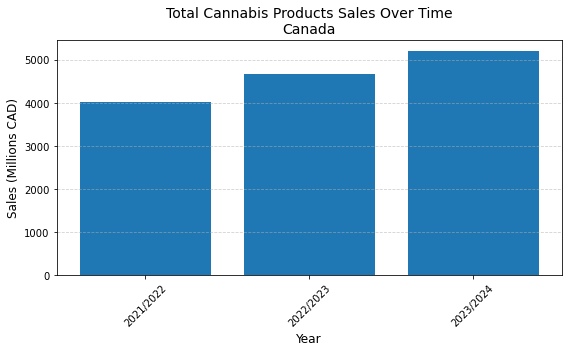

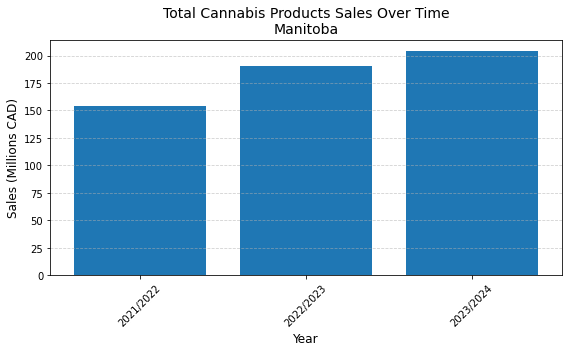

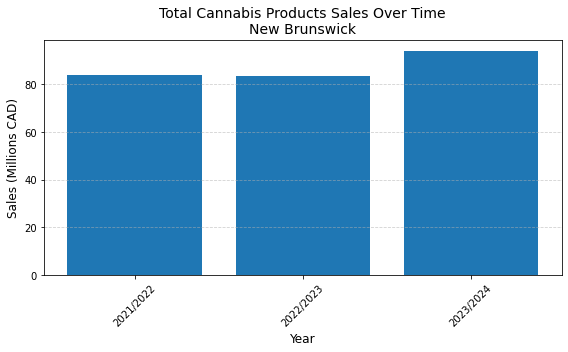

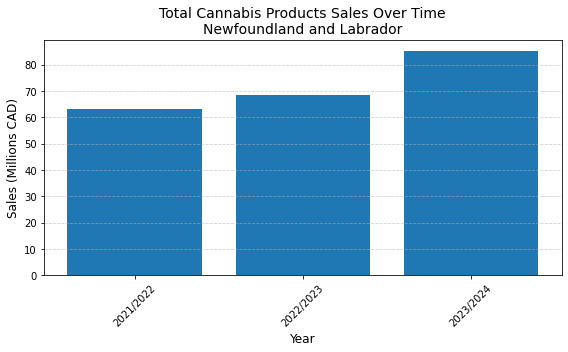

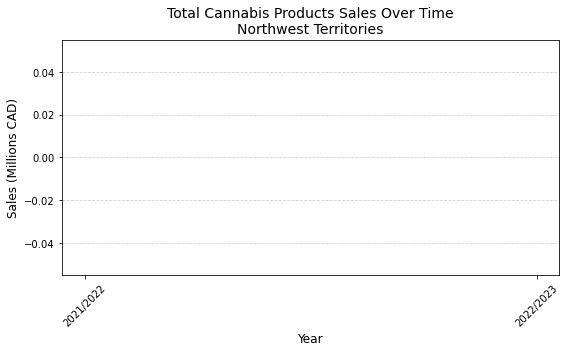

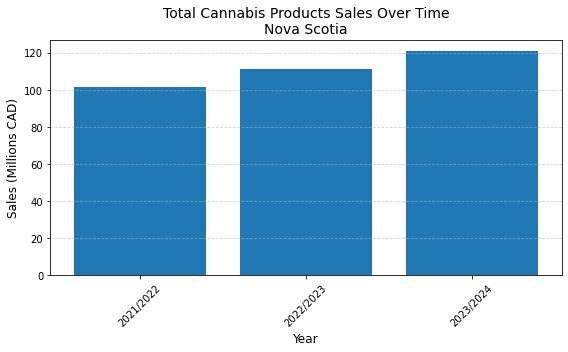

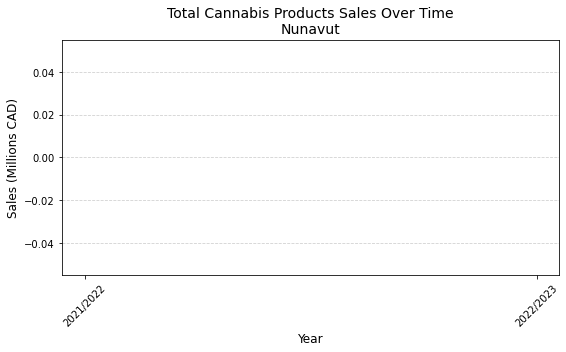

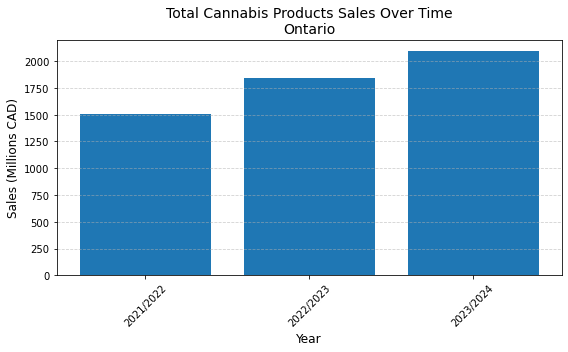

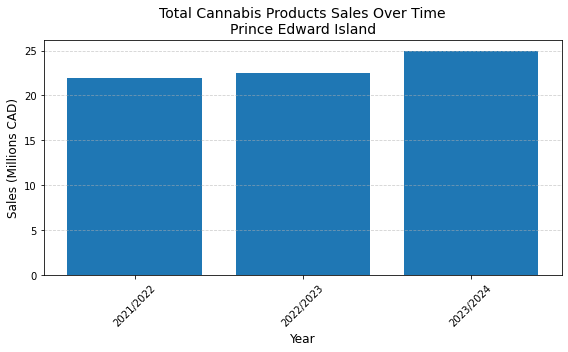

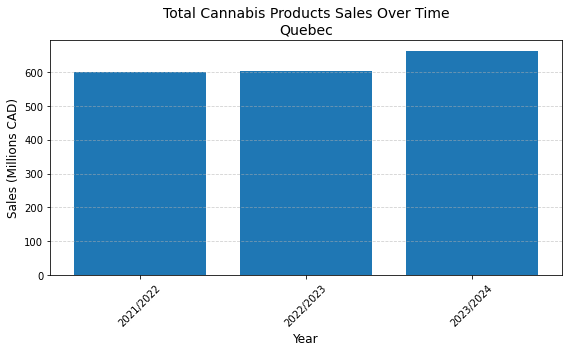

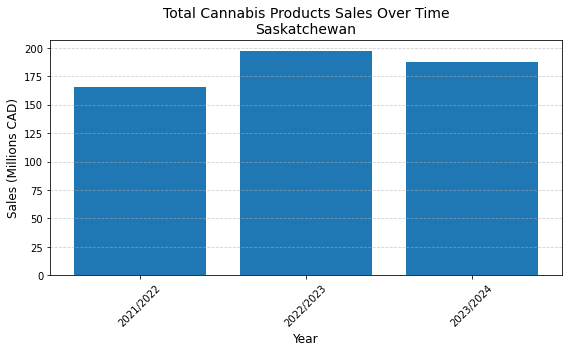

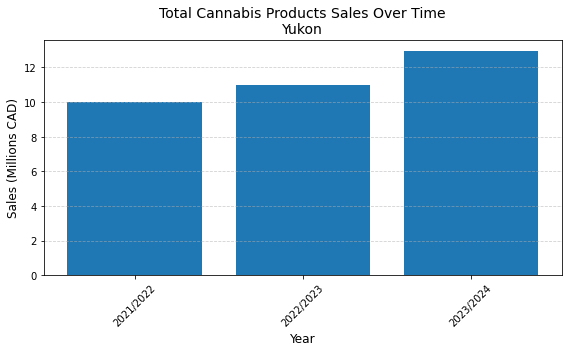

In [27]:
# Normalize total name if needed
sales_data['Type of cannabis'] = sales_data['Type of cannabis'].replace({
    'Total cannabis products': 'Total products'
})

# Filter only totals
total_sales = sales_data[sales_data["Type of cannabis"] == "Total products"]

# Sort by year
total_sales = total_sales.sort_values(["GEO", "REF_DATE"])

# Loop through each location
for location in total_sales["GEO"].unique():

    loc_data = total_sales[total_sales["GEO"] == location]

    if loc_data.empty:
        print(f"No total-sales rows for {location}")
        continue

    plt.figure(figsize=(8, 5))

    # BAR CHART instead of line plot
    plt.bar(
        loc_data["REF_DATE"],
        loc_data["Actual_Sales_CAD"] / 1_000_000   # convert to millions
    )

    plt.title(f"Total Cannabis Products Sales Over Time\n{location}", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Sales (Millions CAD)", fontsize=12)
    plt.grid(axis='y', linestyle="--", alpha=0.6)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [29]:
# Create pivot table: rows = GEO, columns = Year, values = sales
sales_table = total_sales.pivot_table(
    index="GEO",
    columns="REF_DATE",
    values="Actual_Sales_CAD",
    aggfunc="sum"
)

# Convert values to millions for readability
sales_table = sales_table / 1_000_000

# Optional: round values
sales_table = sales_table.round(2)

print(sales_table)

REF_DATE                   2021/2022  2022/2023  2023/2024
GEO                                                       
Alberta                       728.37     821.85     910.63
British Columbia              585.45     697.79     791.22
Canada                       4028.06    4664.03    5204.03
Manitoba                      153.97     190.40     204.44
New Brunswick                  83.96      83.62      93.97
Newfoundland and Labrador      63.27      68.49      85.40
Northwest Territories           0.00       0.00       0.00
Nova Scotia                   101.80     111.22     121.12
Nunavut                         0.00       0.00       0.00
Ontario                      1504.14    1847.12    2097.04
Prince Edward Island           22.06      22.66      25.14
Quebec                        600.63     602.00     662.18
Saskatchewan                  165.88     197.58     188.15
Yukon                          10.31      11.27      13.32
